In [ ]:
# 📌 Step 1: Import thư viện
import pandas as pd

# 📌 Step 2: Đọc file CSV với dấu phân cách là ;
df = pd.read_csv('data01.csv', sep=';')  # thay tên file nếu khác

# 📌 Step 3: Hiển thị kích thước và kiểu dữ liệu
from IPython.display import display
print(f"📊 Kích thước dữ liệu: {df.shape[0]} dòng, {df.shape[1]} cột")
display(pd.DataFrame(df.dtypes, columns=['Kiểu dữ liệu']).rename_axis('Tên cột'))

# 📌 Step 4: Kiểm tra missing value (dạng bảng)
missing_df = pd.DataFrame(df.isnull().sum(), columns=["Số lượng missing"])
missing_df["Tỷ lệ (%)"] = (missing_df["Số lượng missing"] / len(df)) * 100
missing_df = missing_df[missing_df["Số lượng missing"] > 0]
if missing_df.empty:
    print("✅ Không có giá trị thiếu nào trong tập dữ liệu.")
else:
    display(missing_df.style.format({"Tỷ lệ (%)": "{:.2f}"}).background_gradient(cmap='OrRd'))

# 📌 Step 5: Thống kê mô tả cho cả số và chuỗi
display(df.describe(include='all').transpose())

# 📌 Step 6: Số lượng giá trị duy nhất ở mỗi cột
unique_counts = df.nunique().sort_values(ascending=False)
display(pd.DataFrame(unique_counts, columns=["Số lượng giá trị duy nhất"]).rename_axis("Tên cột"))

📊 Kích thước dữ liệu: 41188 dòng, 21 cột


Kiểu dữ liệu
Tên cột                    
age                   int64
job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
month                object
day_of_week          object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed         float64
y                    object

✅ Không có giá trị thiếu nào trong tập dữ liệu.


count unique                top   freq         mean  \
age             41188.0    NaN                NaN    NaN     40.02406   
job               41188     12             admin.  10422          NaN   
marital           41188      4            married  24928          NaN   
education         41188      8  university.degree  12168          NaN   
default           41188      3                 no  32588          NaN   
housing           41188      3                yes  21576          NaN   
loan              41188      3                 no  33950          NaN   
contact           41188      2           cellular  26144          NaN   
month             41188     10                may  13769          NaN   
day_of_week       41188      5                thu   8623          NaN   
duration        41188.0    NaN                NaN    NaN    258.28501   
campaign        41188.0    NaN                NaN    NaN     2.567593   
pdays           41188.0    NaN                NaN    NaN   962.475454   
previous        41188.0    NaN                NaN    NaN     0.172963   
poutcome          41188      3        nonexistent  35563          NaN   
emp.var.rate    41188.0    NaN                NaN    NaN     0.081886   
cons.price.idx  41188.0    NaN                NaN    NaN    93.575664   
cons.conf.idx   41188.0    NaN                NaN    NaN     -40.5026   
euribor3m       41188.0    NaN                NaN    NaN     3.621291   
nr.employed     41188.0    NaN                NaN    NaN  5167.035911   
y                 41188      2                 no  36548          NaN   

                       std     min     25%     50%     75%     max  
age               10.42125    17.0    32.0    38.0    47.0    98.0  
job                    NaN     NaN     NaN     NaN     NaN     NaN  
marital                NaN     NaN     NaN     NaN     NaN     NaN  
education              NaN     NaN     NaN     NaN     NaN     NaN  
default                NaN     NaN     NaN     NaN     NaN     NaN  
housing                NaN     NaN     NaN     NaN     NaN     NaN  
loan                   NaN     NaN     NaN     NaN     NaN     NaN  
contact                NaN     NaN     NaN     NaN     NaN     NaN  
month                  NaN     NaN     NaN     NaN     NaN     NaN  
day_of_week            NaN     NaN     NaN     NaN     NaN     NaN  
duration        259.279249     0.0   102.0   180.0   319.0  4918.0  
campaign          2.770014     1.0     1.0     2.0     3.0    56.0  
pdays           186.910907     0.0   999.0   999.0   999.0   999.0  
previous          0.494901     0.0     0.0     0.0     0.0     7.0  
poutcome               NaN     NaN     NaN     NaN     NaN     NaN  
emp.var.rate       1.57096    -3.4    -1.8     1.1     1.4     1.4  
cons.price.idx     0.57884  92.201  93.075  93.749  93.994  94.767  
cons.conf.idx     4.628198   -50.8   -42.7   -41.8   -36.4   -26.9  
euribor3m         1.734447   0.634   1.344   4.857   4.961   5.045  
nr.employed      72.251528  4963.6  5099.1  5191.0  5228.1  5228.1  
y                      NaN     NaN     NaN     NaN     NaN     NaN

Số lượng giá trị duy nhất
Tên cột                                  
duration                             1544
euribor3m                             316
age                                    78
campaign                               42
pdays                                  27
cons.price.idx                         26
cons.conf.idx                          26
job                                    12
nr.employed                            11
emp.var.rate                           10
month                                  10
education                               8
previous                                8
day_of_week                             5
marital                                 4
default                                 3
housing                                 3
poutcome                                3
loan                                    3
contact                                 2
y                                       2

In [ ]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dữ liệu
df = pd.read_csv('data01.csv', sep=';')  # sửa tên file nếu cần
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

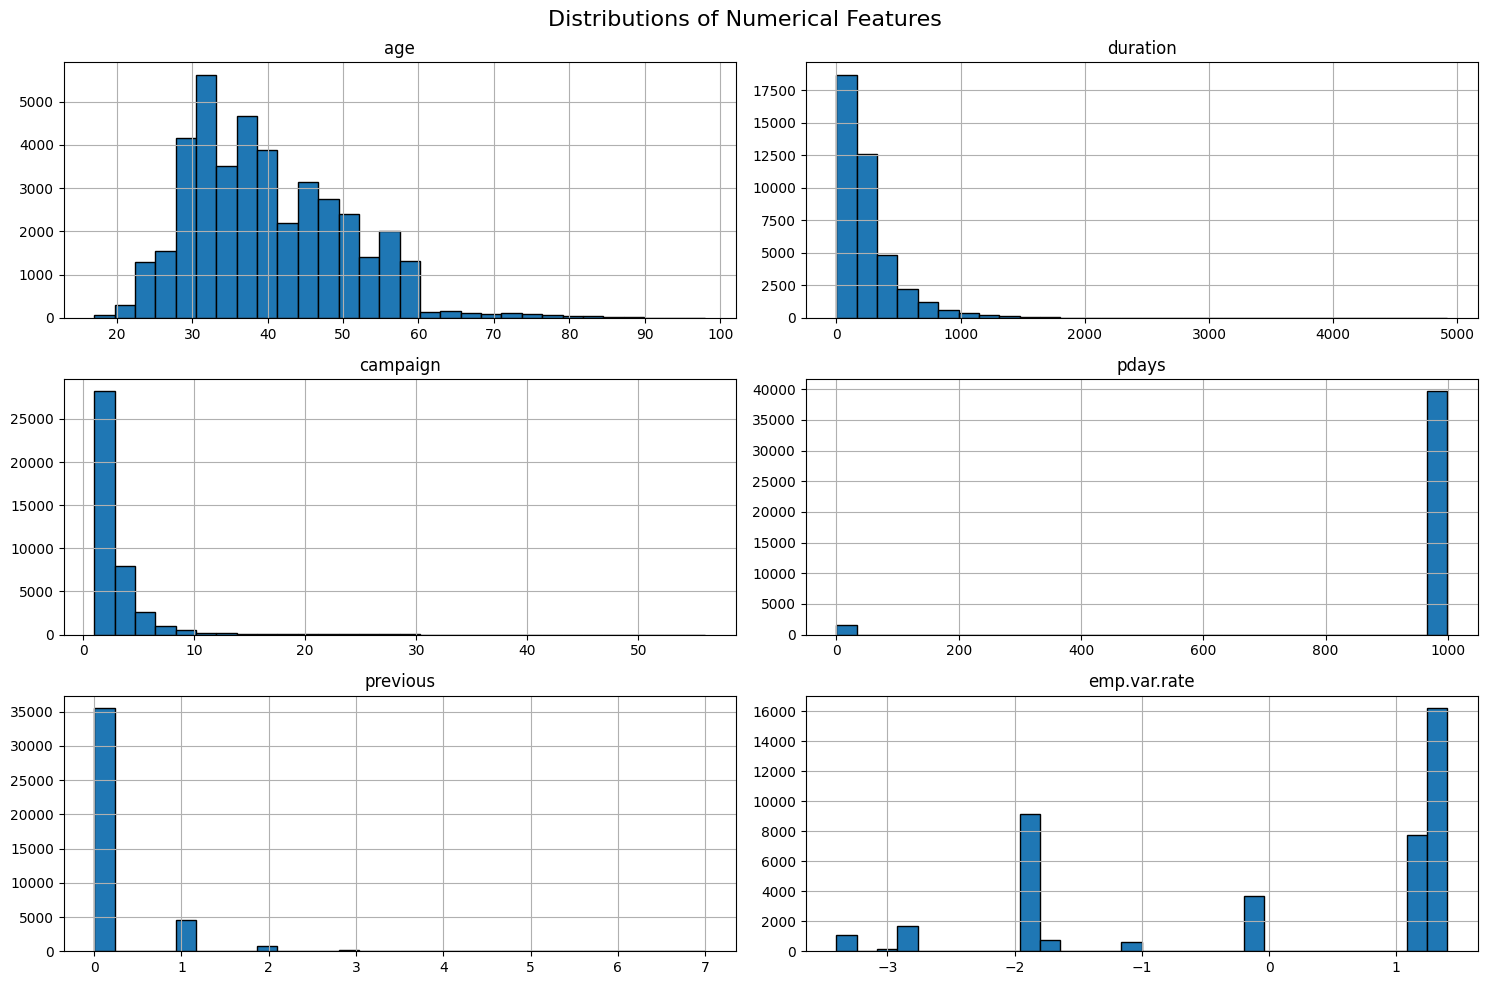

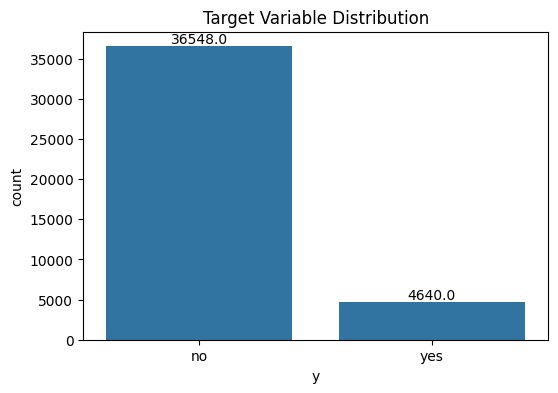

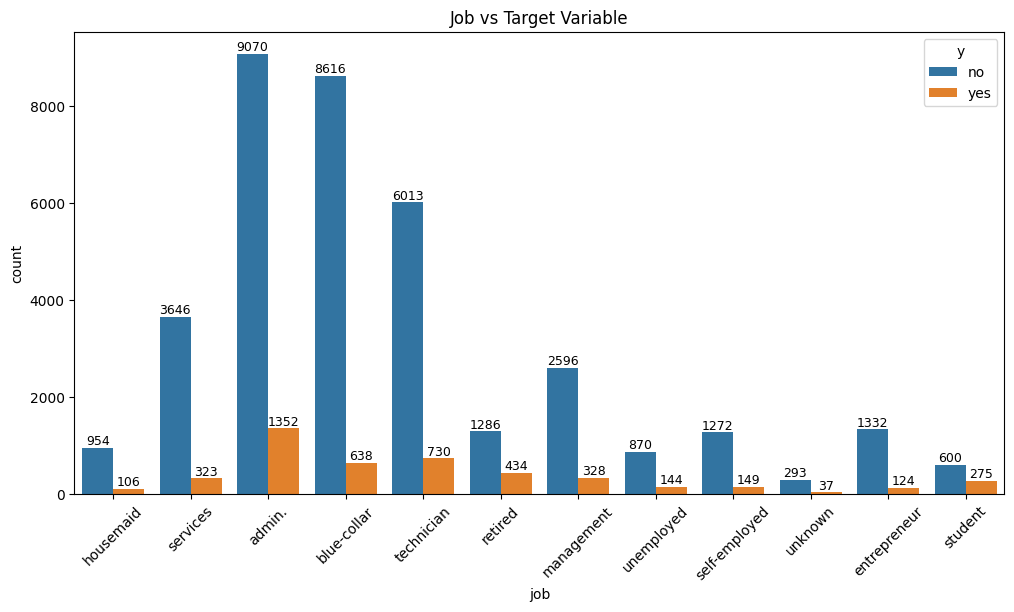

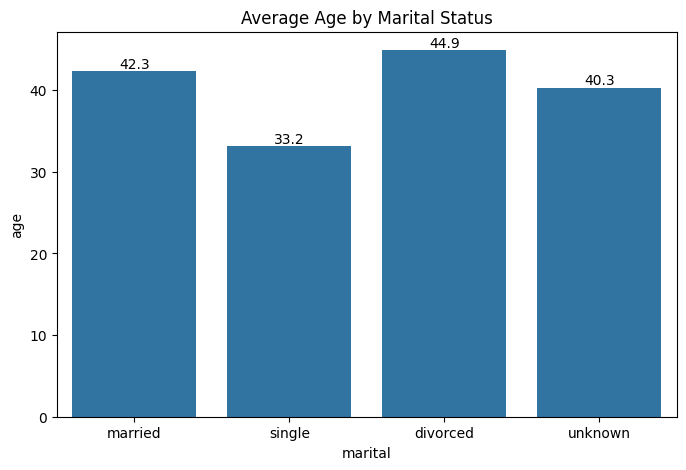

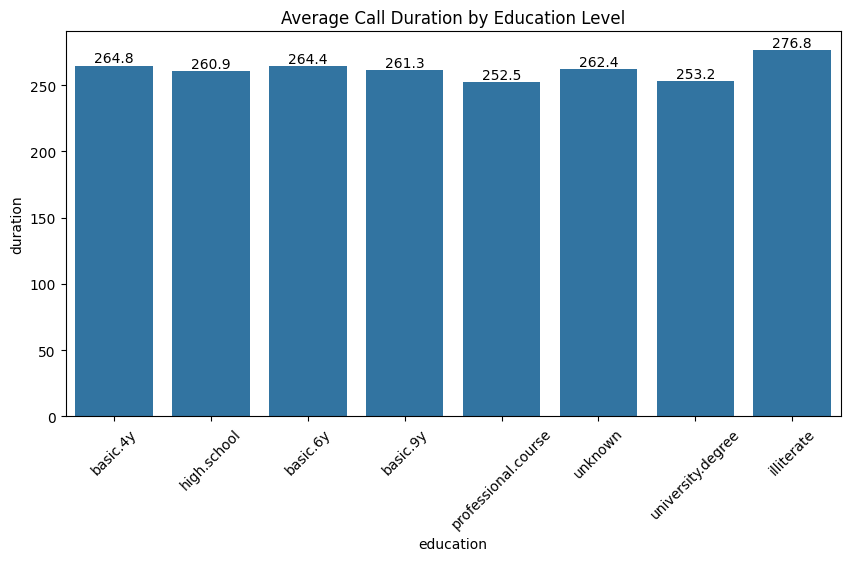

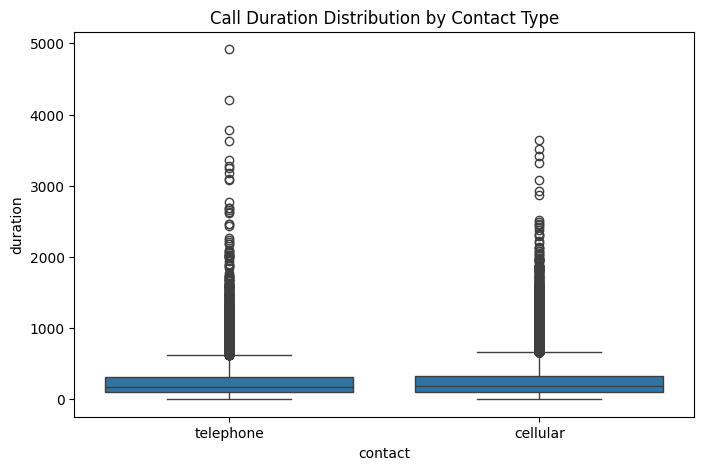

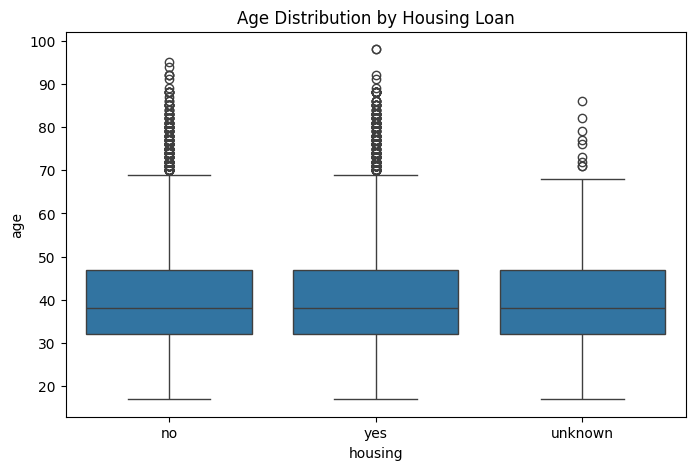

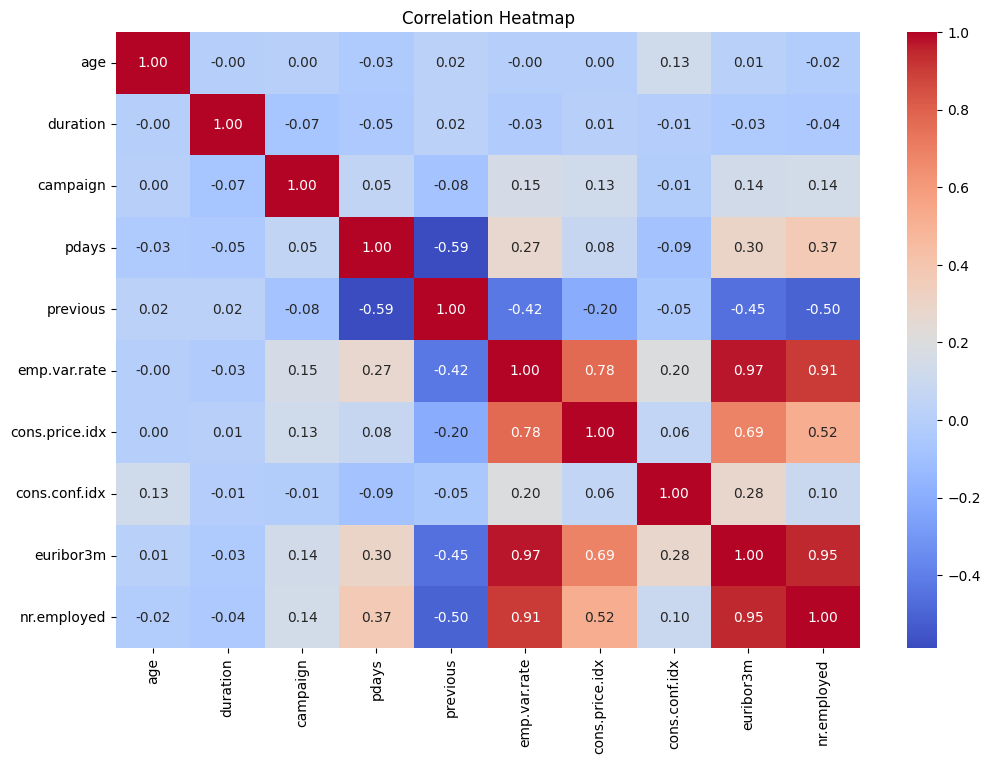

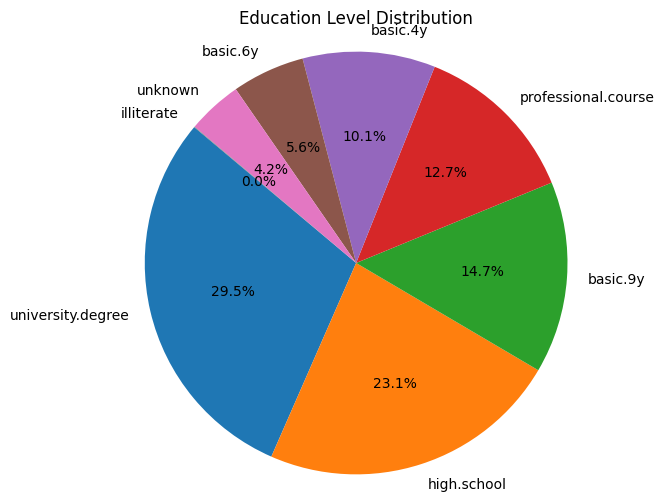

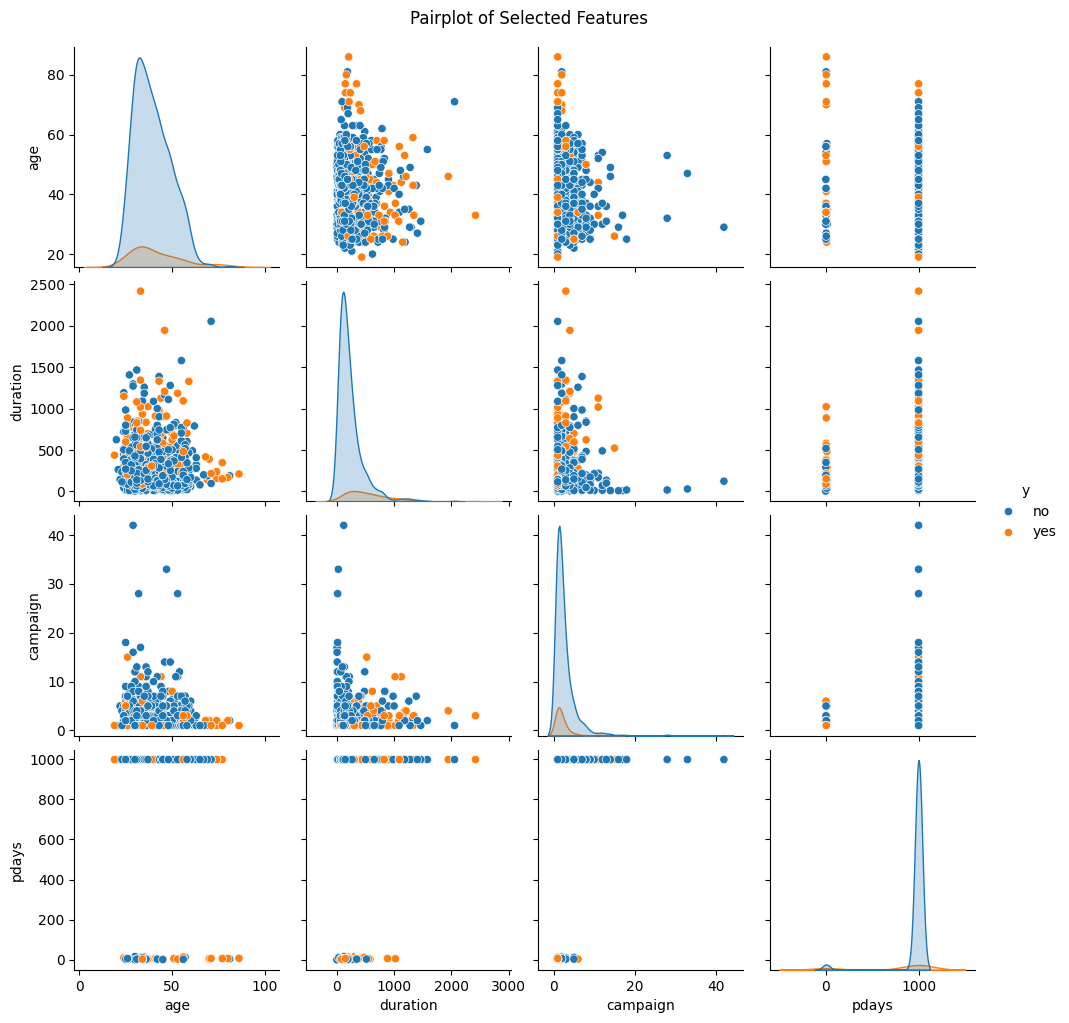

In [ ]:
# 📌 Import thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 📌 Load dữ liệu
df = pd.read_csv('data01.csv', sep=';')  # Đổi tên nếu khác

# 📊 1. Histogram cho các biến số
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# 📊 2. Countplot: Target variable với data label
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='y', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title("Target Variable Distribution")
plt.show()

# 📊 3. Countplot: Job vs y
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='job', hue='y')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)
plt.xticks(rotation=45)
plt.title("Job vs Target Variable")
plt.show()

# 📊 4. Barplot: Age theo marital + data label
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x='marital', y='age', ci=None)
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.title("Average Age by Marital Status")
plt.show()

# 📊 5. Barplot: Duration theo education + label
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='education', y='duration', ci=None)
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.xticks(rotation=45)
plt.title("Average Call Duration by Education Level")
plt.show()

# 📊 6. Boxplot: Duration theo contact
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='contact', y='duration')
plt.title("Call Duration Distribution by Contact Type")
plt.show()

# 📊 7. Boxplot: Age theo housing
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='housing', y='age')
plt.title("Age Distribution by Housing Loan")
plt.show()

# 📊 8. Heatmap tương quan
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 📊 9. Pie chart cho education
edu_counts = df['education'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Education Level Distribution")
plt.axis('equal')
plt.show()

# 📊 10. Pairplot (mẫu 1000 dòng)
sample_df = df.sample(1000, random_state=42)
sns.pairplot(sample_df, vars=['age', 'duration', 'campaign', 'pdays'], hue='y')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

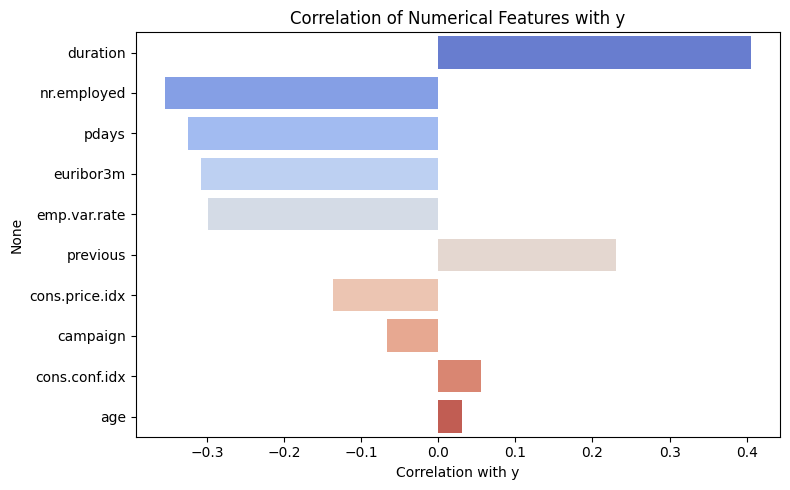

In [ ]:
# Chuyển y sang dạng nhị phân để tính correlation
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# Chọn các biến số và tính tương quan với y
corr_y = df.corr(numeric_only=True)['y_binary'].drop('y_binary').sort_values(key=abs, ascending=False)
corr_y_df = pd.DataFrame(corr_y).rename(columns={'y_binary': 'Correlation with y'})

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_y_df['Correlation with y'], y=corr_y_df.index, palette='coolwarm')
plt.title('Correlation of Numerical Features with y')
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = ['job', 'education', 'marital', 'contact', 'housing']

for col in categorical_cols:
    print(f"🔹 Yes rate by: {col}")
    result = df.groupby(col)['y_binary'].mean().sort_values(ascending=False)
    display(result.to_frame(name='Yes Rate (%)').style.format("{:.2%}"))

🔹 Yes rate by: job


🔹 Yes rate by: education


🔹 Yes rate by: marital


🔹 Yes rate by: contact


🔹 Yes rate by: housing


In [ ]:
# Logic biến mới
df['long_call'] = df['duration'] > 300
df['has_previous_contact'] = df['previous'] > 0
df['risky_client'] = ((df['loan'] == 'yes') | (df['housing'] == 'yes')) & (df['default'] == 'yes')

# Phân tích tỷ lệ 'yes' theo các biến mới
for col in ['long_call', 'has_previous_contact', 'risky_client']:
    print(f"🔍 Yes rate by: {col}")
    display(df.groupby(col)['y_binary'].mean().to_frame(name='Yes Rate (%)').style.format("{:.2%}"))

🔍 Yes rate by: long_call


🔍 Yes rate by: has_previous_contact


🔍 Yes rate by: risky_client


### Logistic Regression

✅ Accuracy: 0.9062879339645545

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.68      0.33      0.44       935

    accuracy                           0.91      8238
   macro avg       0.80      0.65      0.70      8238
weighted avg       0.89      0.91      0.89      8238



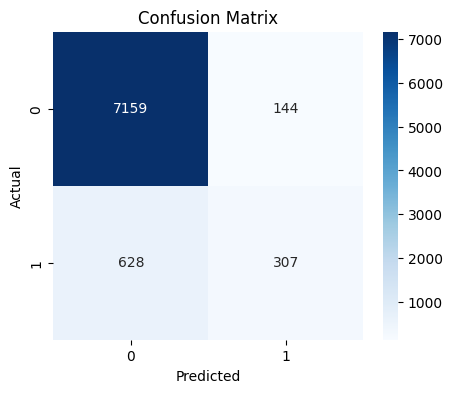

In [ ]:
# 📌 Import thư viện
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Đọc file
df = pd.read_csv('data01.csv', sep=';')

# 📌 Biến mục tiêu y_binary
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# 📌 Feature engineering cơ bản
df['long_call'] = df['duration'] > 300
df['has_previous_contact'] = df['previous'] > 0
df['risky_client'] = ((df['loan'] == 'yes') | (df['housing'] == 'yes')) & (df['default'] == 'yes')

# 📌 Chọn cột dùng cho mô hình
selected_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                 'job', 'education', 'marital', 'contact', 'housing',
                 'loan', 'default', 'long_call', 'has_previous_contact', 'risky_client']

X = df[selected_cols]
y = df['y_binary']

# 📌 Encode biến phân loại
cat_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 📌 Scale biến số
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 📌 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📌 Dự đoán & đánh giá
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 📌 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Logistic Regression (SMOTE) + Random Forest


✅ Accuracy: 0.8294801641586868

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      7332
           1       0.84      0.81      0.83      7288

    accuracy                           0.83     14620
   macro avg       0.83      0.83      0.83     14620
weighted avg       0.83      0.83      0.83     14620



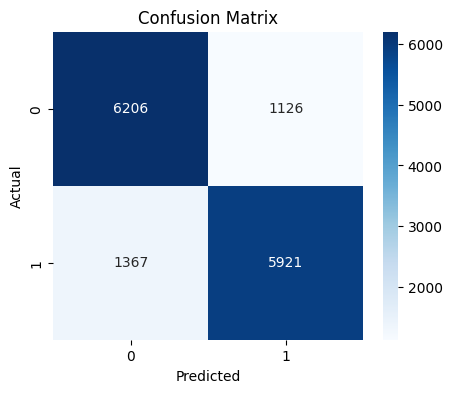


✅ Accuracy: 0.9352941176470588

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7332
           1       0.92      0.95      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



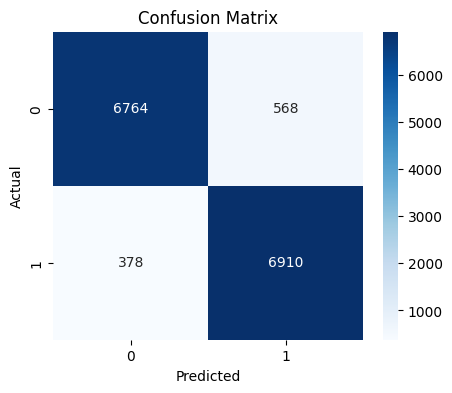

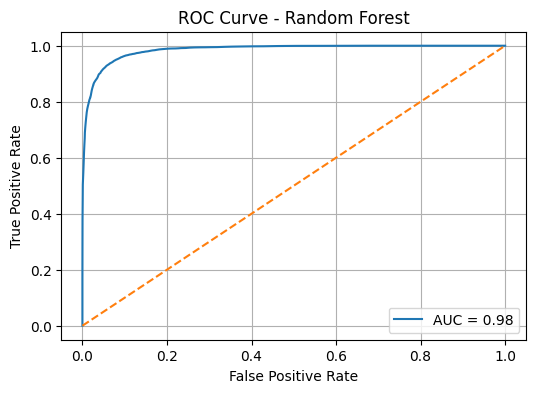

In [ ]:
# 📌 Classification Pipeline with EDA, Feature Engineering, and Model Tuning

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# ✅ Step 2: Load and Prepare Data
df = pd.read_csv('data01.csv', sep=';')
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# ✅ Step 3: Feature Engineering
df['long_call'] = df['duration'] > 300
df['has_previous_contact'] = df['previous'] > 0
df['risky_client'] = ((df['loan'] == 'yes') | (df['housing'] == 'yes')) & (df['default'] == 'yes')

selected_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                 'job', 'education', 'marital', 'contact', 'housing',
                 'loan', 'default', 'long_call', 'has_previous_contact', 'risky_client']
X = df[selected_cols]
y = df['y_binary']

X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 4: SMOTE to Balance Classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ✅ Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# ✅ Step 6: Logistic Regression with SMOTE
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Train logistic model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test)

# ✅ Step 7: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

# ✅ Step 8: ROC Curve for best model (Random Forest assumed)
y_score = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_score):.2f}')
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

# ✅ Done! Ready for deployment or further tuning.

### Triển khai mô hình: Lưu – Load – Dự đoán mẫu mới

In [ ]:
# 📌 Step 1: Import thư viện
import pandas as pd
import numpy as np
import joblib

# Nếu model đã huấn luyện:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 📌 Step 2: Lưu mô hình đã huấn luyện + scaler
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')  # Lưu lại thứ tự/tên cột

['feature_columns.pkl']

In [ ]:
# 📌 Step 1: Tải mô hình
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_cols = joblib.load('feature_columns.pkl')

# 📌 Step 2: Nhập dữ liệu mới (1 dòng ví dụ)
new_data = pd.DataFrame([{
    'age': 30,
    'duration': 350,
    'campaign': 2,
    'pdays': 999,
    'previous': 0,
    'job_blue-collar': 0,
    'job_entrepreneur': 0,
    'job_housemaid': 0,
    # ... (các cột one-hot đầy đủ)
    'long_call': True,
    'has_previous_contact': False,
    'risky_client': False
}])

# 📌 Step 3: Tiền xử lý dữ liệu mới
new_data = new_data.reindex(columns=feature_cols, fill_value=0)  # Khớp cột
new_scaled = scaler.transform(new_data)

# 📌 Step 4: Dự đoán
y_pred = rf_model.predict(new_scaled)
y_proba = rf_model.predict_proba(new_scaled)

print("✅ Prediction:", "Yes" if y_pred[0] == 1 else "No")
print("🔍 Probability (yes):", f"{y_proba[0][1]*100:.2f}%")

✅ Prediction: No
🔍 Probability (yes): 23.00%
